# Assignment 3: Group Project

# Lecturer: Vo Ngoc Yen Nhi

# Due date: Jan 21, 2010

# Spotify's song popularity. 

In [1]:
# import library
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import random
%matplotlib inline
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("data/data.csv")

In [3]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


Before analysing the dataset we need to understand all features of the music
<ul>
    <li><b>valence: </b>Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).</li>
    <li><b>acousticness: </b>Value representing the probability that a track was created using acoustic instruments, including voice. A score nearly equal 1.0 means the song is most likely to be an acoustic one.</li>
    <li><b>danceability: </b>A track's “foot-tapping” quality, based on tempo, rhythm stability, beat strength, and isochrony.</li>
    <li><b>duration_ms: </b>The length of a track is calculated in milliseconds by the Spotify analyzer (1s = 1000ms)</li>
    <li><b>energy: </b>A perceptual estimation of frenetic activity throughout a track. High-Energy tracks have increased entropy, and tend to feel fast, loud, and noisy</li>
    <li><b>explicit: </b>If the lyric or content of the track contain one or more of the following criteria which could be considered offensive or unsuitable for children, explicit = 1:
                <ul>
                    <li>strong language (one word is already enough).</li>
                    <li>references to violence, physical, or mental abuse.</li>
                    <li>references to sexual behaviour.</li>
                    <li>discriminatory language.</li>
                </ul>
    </li>
    <li><b>instrumentalness: </b>Value representing the probability that a track was created using only instrumental sounds, as opposed to speech and/or singing. (1: only sound, 0: only voice)</li>
    <li><b>liveness: </b>Value representing the probability that a track was recorded in the presence of an audience rather than in a studio. Liveness = 1 means this track is the live version</li>
    <li><b>loudness: </b>The average loudness of a track in decibels(dB). Loudness is the psychological correlate of signal amplitude. 0 dB means that you are right at the threshold of human hearing ability. A positive dB value means that the sound is a few times louder than the threshold, while a negative dB value means that you are a few times softer than that threshold.</li>
    <li><b>mode: </b>The binary value representing whether the track starts with a major (1) chord progression or not (0).</li>
    <li><b>speechiness: </b>Value representing the presence of spoken words in a track, e.g., talk show, audio book, poetry, rap.</li>
    <li><b>tempo: </b>The value represents a tempo throughout the song. This value is measured in beats per minute (BPM).</li>
</ul>

## Task 1.1: Data Retrieving and Cleaning

<h3>Retrieving data</h3>

On this dataset we just keep all samples with year value >= 2000 because we need new values for predicting recently musics.

In [4]:
# take samples with year >= 2000 and save as a new dataset
df_final = df[df['year']>=2000]
df_final

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
15606,0.285,2000,0.00239,['Coldplay'],0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,2000-07-10,0.0281,173.372
15607,0.613,2000,0.14300,['OutKast'],0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,2000-10-31,0.2690,94.948
15608,0.400,2000,0.00958,['Linkin Park'],0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,2000-10-24,0.0584,105.143
15609,0.543,2000,0.00664,['3 Doors Down'],0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,2000,0.0286,99.009
15610,0.760,2000,0.03020,['Eminem'],0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,2000-05-23,0.0572,104.504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.734,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.195,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


We only need "year" column which was splitted from "release_date" column, so that we will drop "release_date" column

In [5]:
# drop "release_date" column
df_final.drop(['release_date'],axis=1, inplace=True)

C:\Users\Thang du\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
# split data to training and testing dataset
train, test= train_test_split(df_final, test_size=0.2, random_state=0, shuffle=True)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [7]:
# Save test set in json format for testing API (evaluate)
test.to_json('test_evaluate.json', orient='index')

In [8]:
# Save test set in json format for testing API (predict)
output = test.drop(['popularity'],axis=1)
output.to_json('test_predict.json', orient='index')

In [9]:
# check shape of the datasets
train.shape, test.shape

((33160, 18), (8290, 18))

<h3>Cleaning data</h3>

<b>Missing values</b>

In [10]:
# check NA values
df_final.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
speechiness         0
tempo               0
dtype: int64

Both training and testing dataset are not contain missing value.

<b>Sanity check</b>

In [11]:
# describe stat of training dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
valence,33160.0,0.493367,0.251619,0.0,0.29500,0.488000,0.691000,1.000
year,33160.0,2010.024849,6.065859,2000.0,2005.00000,2010.000000,2015.000000,2020.000
acousticness,33160.0,0.265034,0.298129,0.0,0.02010,0.133000,0.444000,0.996
danceability,33160.0,0.590513,0.174885,0.0,0.47900,0.602000,0.720000,0.986
duration_ms,33160.0,231328.110706,88060.761124,30301.0,190867.00000,222093.000000,258440.000000,5403500.000
energy,33160.0,0.639489,0.229259,0.0,0.49700,0.671000,0.821000,1.000
explicit,33160.0,0.218758,0.413410,0.0,0.00000,0.000000,0.000000,1.000
instrumentalness,33160.0,0.082157,0.234374,0.0,0.00000,0.000004,0.001322,1.000
key,33160.0,5.254916,3.570017,0.0,2.00000,5.000000,8.000000,11.000
liveness,33160.0,0.192295,0.160105,0.0,0.09600,0.126000,0.243000,1.000


In [12]:
# check skewness of training dataset
from scipy.stats import skew
numeric_feats = train.dtypes[train.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_feats

duration_ms         15.449180
instrumentalness     2.889149
speechiness          2.652255
liveness             2.240238
explicit             1.360619
acousticness         1.037897
tempo                0.247143
valence              0.067605
key                  0.015152
year                 0.001211
danceability        -0.429757
energy              -0.651768
mode                -0.680406
popularity          -1.102954
loudness            -2.853029
dtype: float64

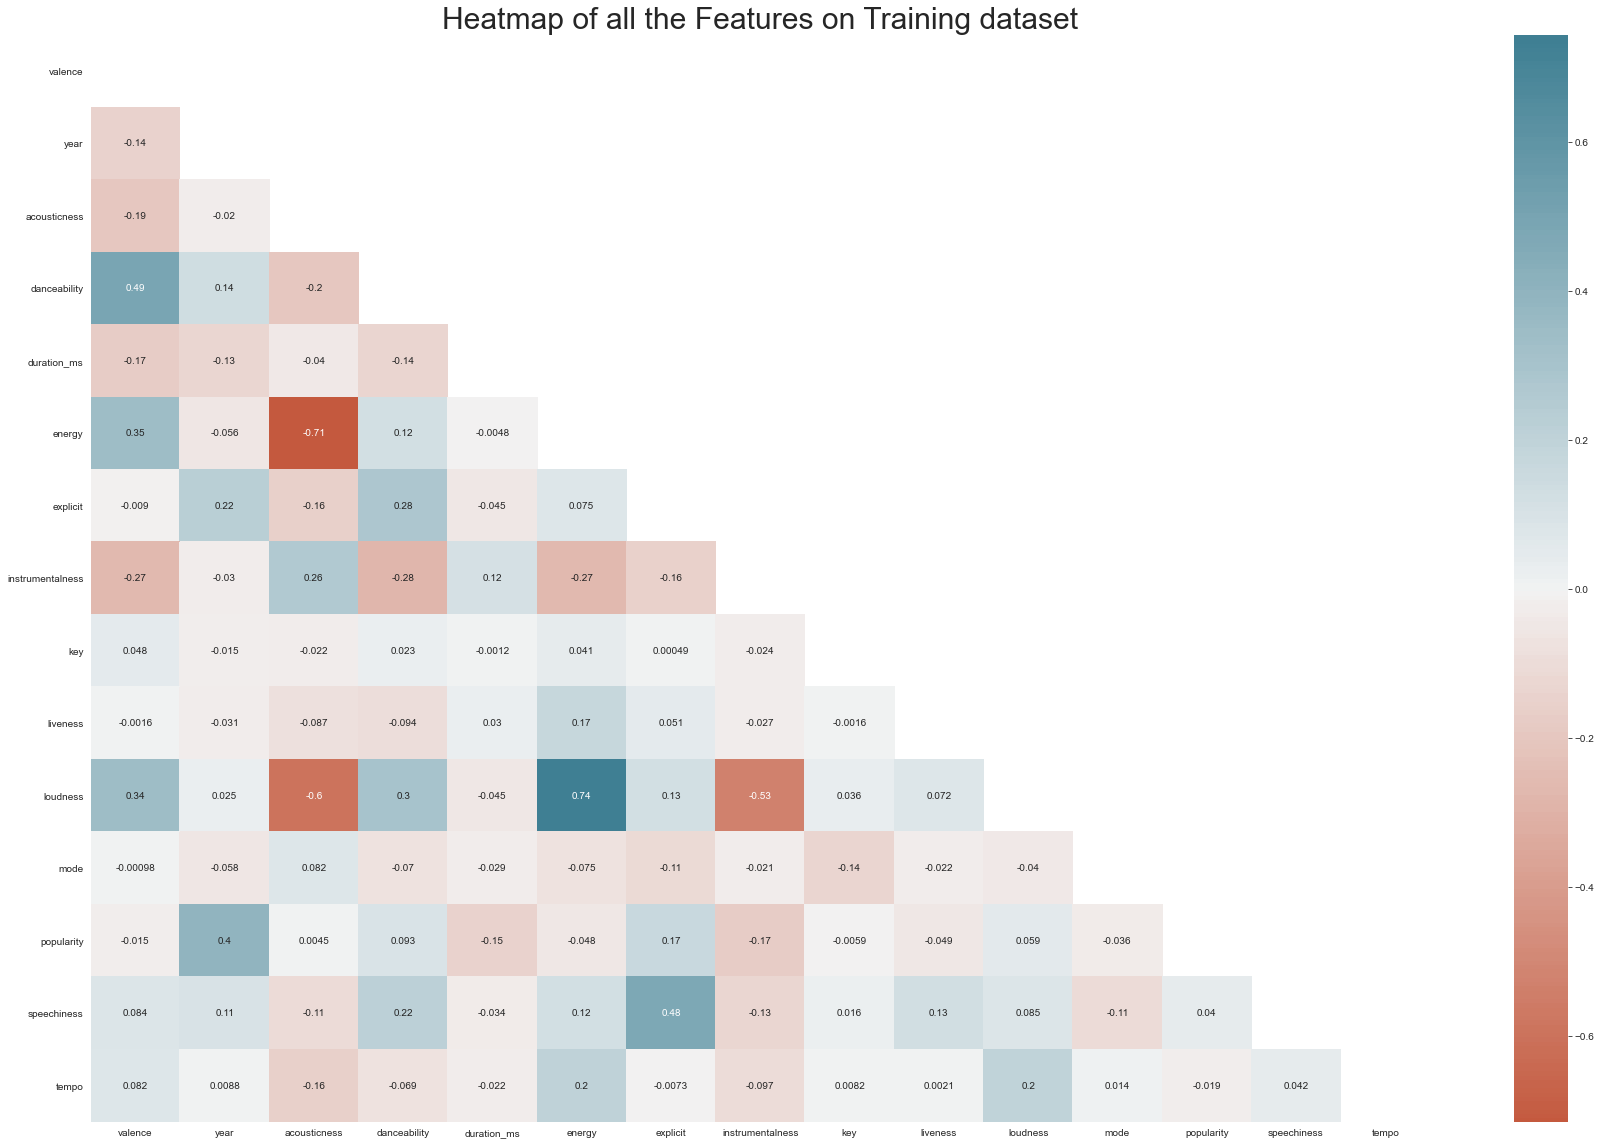

In [13]:
# Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
# Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
# Give title. 
plt.title("Heatmap of all the Features on Training dataset", fontsize = 30);

According to the skewness check on training dataset, only "duration_ms" has a problem with skewness. However, when we check on the heatmap, there are no relationship between "popularity" and "duration_ms". Therefore, we will remove this column from the training dataset.

In [14]:
# describe stat of testing dataset
test.describe().T

,count,mean,std,min,25%,50%,75%,max
valence,8290.0,0.494517,0.251857,0.0,0.2910,0.490000,0.69975,1.000
year,8290.0,2009.993124,6.080696,2000.0,2005.0000,2010.000000,2015.00000,2020.000
acousticness,8290.0,0.262950,0.296313,0.0,0.0200,0.133000,0.44400,0.996
danceability,8290.0,0.593264,0.173256,0.0,0.4860,0.605000,0.71900,0.986
duration_ms,8290.0,231417.498794,107141.732794,31360.0,191213.7500,222413.500000,255973.00000,4269407.000
energy,8290.0,0.641143,0.227480,0.0,0.4970,0.672000,0.82300,0.999
explicit,8290.0,0.219783,0.414124,0.0,0.0000,0.000000,0.00000,1.000
instrumentalness,8290.0,0.082609,0.233755,0.0,0.0000,0.000003,0.00126,1.000
key,8290.0,5.173100,3.581945,0.0,2.0000,5.000000,8.00000,11.000
liveness,8290.0,0.190181,0.155344,0.0,0.0954,0.125000,0.24375,0.987


In [15]:
# check skewness of testing dataset
numeric_feats = test.dtypes[test.dtypes != "object"].index
skewed_feats = test[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_feats

duration_ms         20.564785
instrumentalness     2.865866
speechiness          2.669817
liveness             2.180593
explicit             1.353381
acousticness         1.041537
tempo                0.245982
valence              0.071293
key                  0.040408
year                -0.012853
danceability        -0.452829
energy              -0.633014
mode                -0.718267
popularity          -1.001929
loudness            -2.838182
dtype: float64

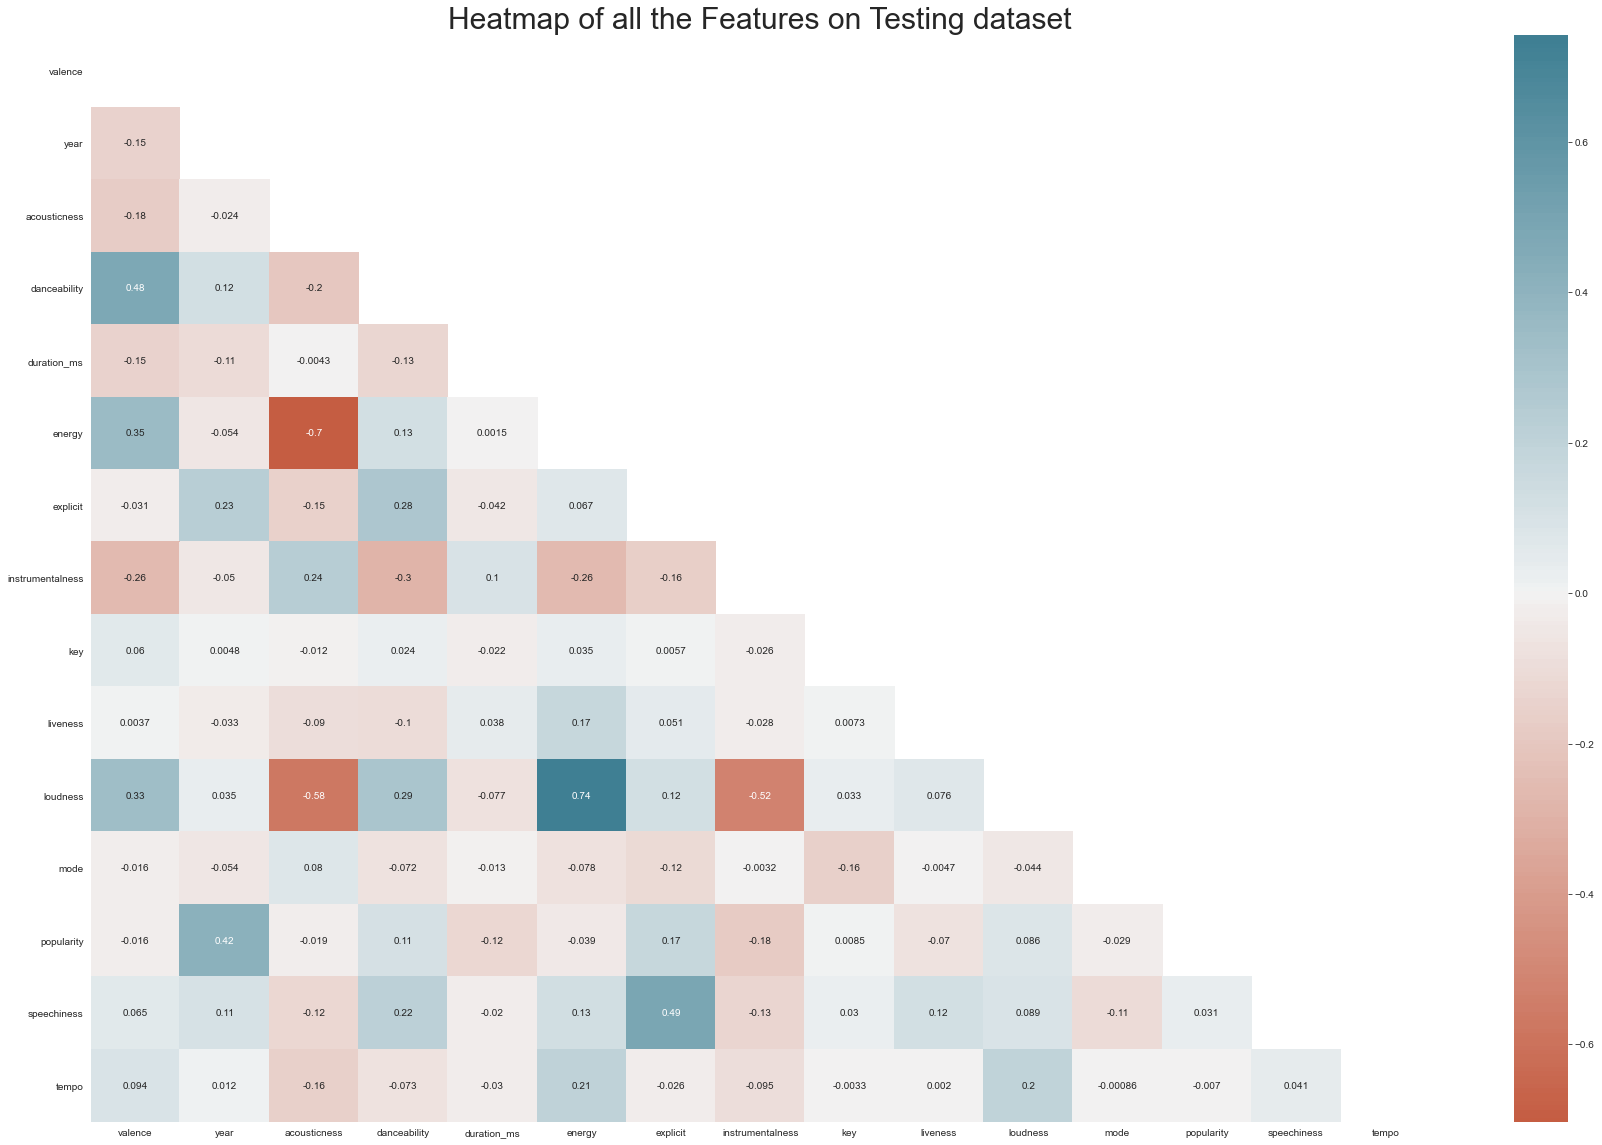

In [16]:
# Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
# Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(test.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
# Give title. 
plt.title("Heatmap of all the Features on Testing dataset", fontsize = 30);

Testing dataset also has the same problem with training dataset. Therefore I will drop it from the dataset.

In [17]:
# drop "duration_ms" column from training and testing datasets
train.drop(['duration_ms','valence','acousticness','energy','instrumentalness','liveness','mode','tempo'], axis =1, inplace = True)
test.drop(['duration_ms','valence','acousticness','energy','instrumentalness','liveness','mode','tempo'], axis = 1, inplace = True)

In [18]:
print(train.columns)
print(test.columns)

Index(['year', 'artists', 'danceability', 'explicit', 'id', 'key', 'loudness',
       'name', 'popularity', 'speechiness'],
      dtype='object')
Index(['year', 'artists', 'danceability', 'explicit', 'id', 'key', 'loudness',
       'name', 'popularity', 'speechiness'],
      dtype='object')


<b>Typos check</b>

In [19]:
train

,year,artists,danceability,explicit,id,key,loudness,name,popularity,speechiness
0,2001,['System Of A Down'],0.364,0,4e9eGQYsOiBcftrWXwsVco,0,-4.217,Aerials,74,0.0566
1,2005,['Jars Of Clay'],0.499,0,3Ibqth7iNwWwM28ZWcLk3Q,7,-5.207,I'll Fly Away,40,0.0245
2,2001,['Banda Cuisillos'],0.380,0,7AzWgBsTUlIgytC9f90y6W,8,-6.679,Cartas Marcadas,41,0.0421
3,2011,['Mac Miller'],0.617,1,24OMJgeZvpSu92TbAe2WYh,9,-5.210,Party On Fifth Ave.,59,0.3280
4,2011,['Frank Ocean'],0.653,0,3CgZCQyuyxHRMWB9BTwmni,0,-8.183,Swim Good,66,0.0881
...,...,...,...,...,...,...,...,...,...,...
33155,2020,['KAROL G'],0.730,0,7wTeZteapKIkP0CWSdr5hW,2,-4.936,A Ella,1,0.1780
33156,2014,['The Buttertones'],0.399,0,2M7enaZSs1DRRjZscA4LAj,11,-7.809,Reminiscing,49,0.0307
33157,2006,['Red Hot Chili Peppers'],0.546,0,0CZQNI3Evb4Nd8GeU49LFj,11,-3.719,C'mon Girl,50,0.0374
33158,2001,"['Antonio Vivaldi', 'Kyung Wha Chung', ""St. Lu...",0.292,0,4wgS4pen0Kej9PafGhUhMJ,7,-14.098,"Vivaldi: Violin Concerto in G Minor, RV 315, ""...",52,0.0378


In [20]:
test

,year,artists,danceability,explicit,id,key,loudness,name,popularity,speechiness
0,2015,['Five Finger Death Punch'],0.569,0,672sw1HfPnFsiuY03qM0pn,4,-4.231,Meet My Maker,50,0.1520
1,2008,"['Lil Wayne', 'Static Major']",0.832,1,1pm7lQGl6mvKWDxesZTVFp,0,-9.390,Lollipop,60,0.0826
2,2020,"['J Balvin', 'Tainy', 'Dua Lipa', 'Bad Bunny']",0.571,0,0EhpEsp4L0oRGM0vmeaN5e,6,-8.234,UN DIA (ONE DAY) (Feat. Tainy),92,0.0545
3,2010,['Bruce Springsteen'],0.731,0,0Tk2agqmwJajtoX6sCxngb,7,-10.581,Fire,52,0.0424
4,2000,['Mudvayne'],0.745,0,099F8DBwudywg5KK6WVFox,11,-4.503,Nothing To Gein,41,0.0627
...,...,...,...,...,...,...,...,...,...,...
8285,2004,['Roxy Music'],0.839,0,34Rt8Ti2OAsA8s39rLgyML,2,-6.072,Love Is The Drug,50,0.0809
8286,2019,['Tommy Ice'],0.796,1,6PAr1wwpxJQhHn2c6wKN4O,8,-9.895,Forever,65,0.2510
8287,2006,['Rascal Flatts'],0.603,0,0xhiQVCz22skOX51jsrfyE,0,-4.753,Stand,52,0.0314
8288,2001,['Bee Gees'],0.600,0,0dAlZYy2WxFOAN96PcVQow,7,-7.910,Heartbreaker,49,0.0533


In [21]:
train['artists'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                     ['System Of A Down']
1                                         ['Jars Of Clay']
2                                      ['Banda Cuisillos']
3                                           ['Mac Miller']
4                                          ['Frank Ocean']
                               ...                        
33155                                          ['KAROL G']
33156                                  ['The Buttertones']
33157                            ['Red Hot Chili Peppers']
33158    ['Antonio Vivaldi', 'Kyung Wha Chung', "St. Lu...
33159                          ['Rainbow Kitten Surprise']
Name: artists, Length: 33160, dtype: object>

In [22]:
# convert string value to lower case
train['artists'] = train['artists'].str.lower()
test['artists'] = test['artists'].str.lower()
train['name'] = train['name'].str.lower()
test['name'] = test['name'].str.lower()

In [23]:
train.head()

,year,artists,danceability,explicit,id,key,loudness,name,popularity,speechiness
0,2001,['system of a down'],0.364,0,4e9eGQYsOiBcftrWXwsVco,0,-4.217,aerials,74,0.0566
1,2005,['jars of clay'],0.499,0,3Ibqth7iNwWwM28ZWcLk3Q,7,-5.207,i'll fly away,40,0.0245
2,2001,['banda cuisillos'],0.380,0,7AzWgBsTUlIgytC9f90y6W,8,-6.679,cartas marcadas,41,0.0421
3,2011,['mac miller'],0.617,1,24OMJgeZvpSu92TbAe2WYh,9,-5.210,party on fifth ave.,59,0.3280
4,2011,['frank ocean'],0.653,0,3CgZCQyuyxHRMWB9BTwmni,0,-8.183,swim good,66,0.0881


In [25]:
test.head()

,year,artists,danceability,explicit,id,key,loudness,name,popularity,speechiness
0,2015,['five finger death punch'],0.569,0,672sw1HfPnFsiuY03qM0pn,4,-4.231,meet my maker,50,0.1520
1,2008,"['lil wayne', 'static major']",0.832,1,1pm7lQGl6mvKWDxesZTVFp,0,-9.390,lollipop,60,0.0826
2,2020,"['j balvin', 'tainy', 'dua lipa', 'bad bunny']",0.571,0,0EhpEsp4L0oRGM0vmeaN5e,6,-8.234,un dia (one day) (feat. tainy),92,0.0545
3,2010,['bruce springsteen'],0.731,0,0Tk2agqmwJajtoX6sCxngb,7,-10.581,fire,52,0.0424
4,2000,['mudvayne'],0.745,0,099F8DBwudywg5KK6WVFox,11,-4.503,nothing to gein,41,0.0627


## Task 1.2: Data Exploration

Text(0.5, 1.0, 'The popularity of tracks from 2000 - 2020')

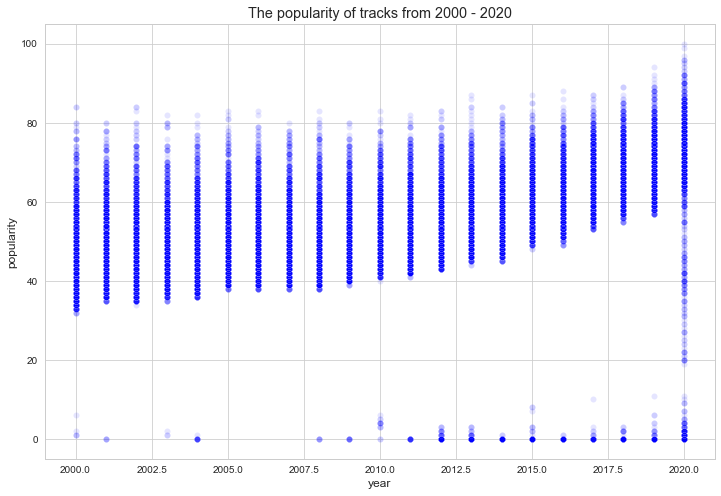

In [39]:
# Relationship of popularity and year
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x="year", y="popularity", ax=ax, data=train, alpha=0.1, color='blue').set_title('The popularity of tracks from 2000 - 2020')

According to this plot, we can clearly see the tracks from 2000 to 2020 have been received very well by listeners, the most obvious testimony to this is the popularity of these years from medium to high (40 to 80). Not only that, the chart also shows that as time goes on, there are more and more songs with a huge increase in popularity, peaking in 2020 with a lot of songs reaching 100 popularity points. This is understandable as the majority of Spotify's customers are young users and modern-oriented songs will gain more attention than old songs from many years ago. 